# Import all the libraries to be used in the dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
#The warning filter in Python handles warnings 

# Load the dataset 

In [3]:
haberman=pd.read_csv("haberman.csv")

In [4]:
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
haberman.tail()

,age,year,nodes,status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


 survival_status:
 1=Survived
 2=Not Survived

# HIGH LEVEL STATISTICS

In [6]:
#Number of points

print(haberman.shape)

(306, 4)


In [7]:
#Number of features

print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [8]:
#Data points for each class who survived or not survived

haberman["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

# OBJECTIVE:
To find and predict whether the patient will survive the given treatment or not

# UNIVARIANT ANALYSIS

# PDF

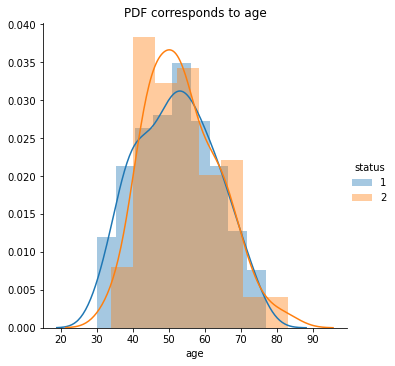

In [12]:
#using age as feature
sns.FacetGrid(haberman,hue='status',size=5).map(sns.distplot,'age').add_legend()
plt.title("PDF corresponds to age")
plt.show()

#distplot--->function combines the matplotlib hist function with the seaborn kdeplot() and rugplot() functions. It can also fit
#scipy.stats distributions and plot the estimated PDF over the data.

Here the histogram is overlapping
It is seen people within 40-60 are more likely to die
People less than 40 are likely to survive

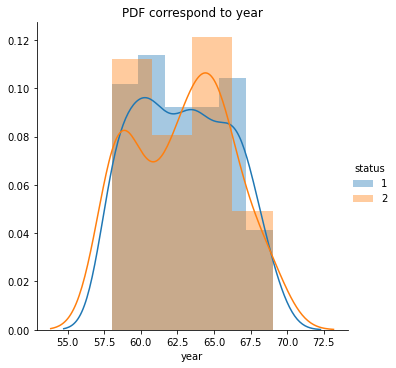

In [13]:
#using Operation year as feature
sns.FacetGrid(haberman,hue='status',size=5).map(sns.distplot,'year').add_legend()
plt.title("PDF correspond to year")
plt.show()

The plot show overlapping between both the classes i.e 1 & 2
It is clearly seen that patients whose operation was done between 60-65 died

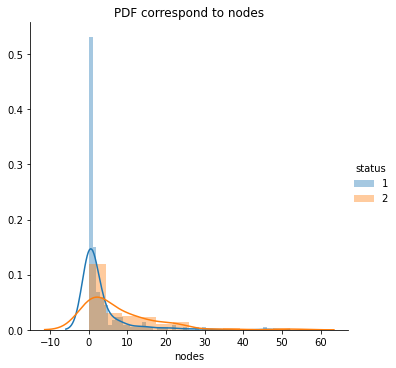

In [15]:
#using Auxillary nodes as feature
sns.FacetGrid(haberman,hue='status',size=5).map(sns.distplot,'nodes').add_legend()
plt.title("PDF correspond to nodes")
plt.show()

The above plot are partially overlapping among the class observed
It is clearly visible that the patients with 0 axillary nodes will survive


# CDF

In [177]:
class_1=haberman.loc[haberman["status"]==1]
class_2=haberman.loc[haberman["status"]==2]

#loc-->Access a group of rows and columns by label(s) or a boolean array.

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


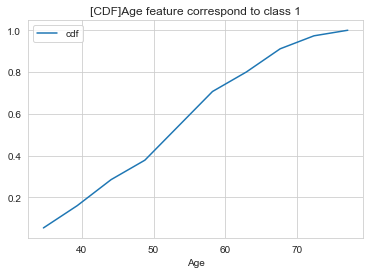

In [179]:
#class_1 corespond to Age feature 

counts,bin_edges=np.histogram(class_1['age'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
#cumsum-->Return the cumulative sum of the elements along a given axis
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.xlabel('Age')
plt.title("[CDF]Age feature correspond to class 1")
plt.legend()
plt.show()

It is clear that patients having age between 50 to 60 have greater rate of survival.
Almost 90% patient who survived have the age less than or equal to 70

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


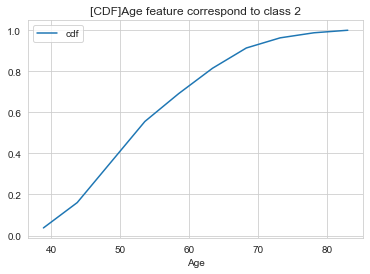

In [184]:
#class_2 corespond to Age feature 

counts,bin_edges=np.histogram(class_2['age'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.xlabel('Age')
plt.title("[CDF]Age feature correspond to class 2")
plt.legend()
plt.show()

It can be seen that around 74% of patient who died within 5 years have an age less than or equal to 60 years 

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


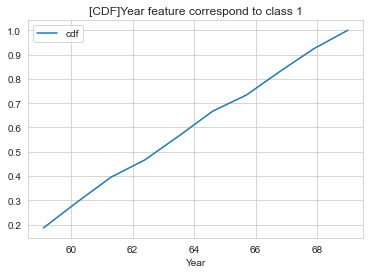

In [188]:
#class_1 corespond to Operation Year feature 

counts,bin_edges=np.histogram(class_1['year'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.xlabel('Year')
plt.title("[CDF]Year feature correspond to class 1")
plt.legend()
plt.show()

It is observed that 60% patient are undergoing surgery before the year 1964 and survived

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


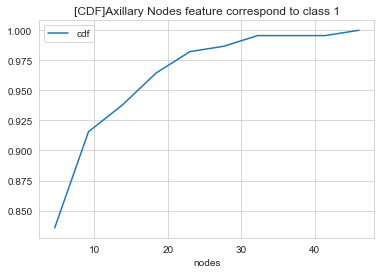

In [187]:
#class_1 corespond to Axillary Nodes feature 

counts,bin_edges=np.histogram(class_1['nodes'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.xlabel('nodes')
plt.title("[CDF]Axillary Nodes feature correspond to class 1")
plt.legend()
plt.show()

It can be seen that almost 85% of the patient who survived have axillary nodes less than 10.
Hence, lower the axillary nodes, greater the chances of survival

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


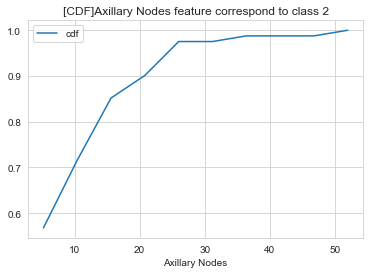

In [186]:
#class_2 corespond to Axillary Nodes feature 

counts,bin_edges=np.histogram(class_2['nodes'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.xlabel('Axillary Nodes')
plt.title("[CDF]Axillary Nodes feature correspond to class 2")
plt.legend()
plt.show()

It can be observed that around 96% of the patients who died within 5 years on surgery have axillary nodes less than equal to 28 

# BOX PLOT

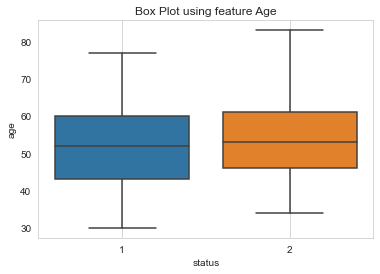

In [153]:
#Box plot using Age feature
sns.boxplot(x='status',y='age',data=haberman)
plt.grid()
plt.title("Box Plot using feature Age")
plt.show()

In this plot we come to a conclusion that 95% data points are overlapping with almost median
Hence,age not sufficent to find exact scenario

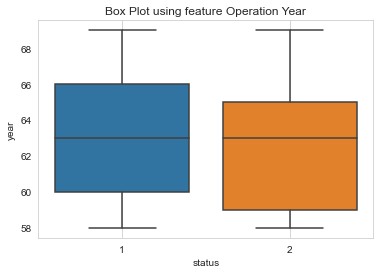

In [161]:
##Box plot using Operation Year feature
sns.boxplot(x='status',y='year',data=haberman)
plt.grid()
plt.title("Box Plot using feature Operation Year")
plt.show()

In this plot we come to a conclusion that 80% data points are overlapping with almost median
Hence,age not sufficent to find exact scenario

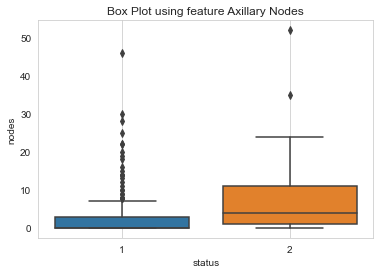

In [162]:
##Box plot using feature Axillary Nodes
sns.boxplot(x='status',y='nodes',data=haberman)
plt.grid()
plt.title("Box Plot using feature Axillary Nodes")
plt.show()

In this plot we conclude that class 1 have outliers and around 50% of patients have axil nodes less than or equal to 3

# VIOLIN PLOT

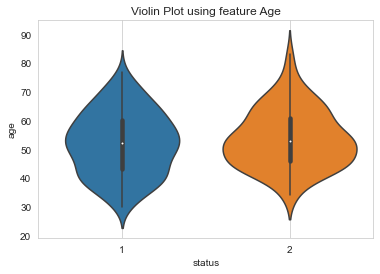

In [163]:
#Violon plot using Age feature
sns.violinplot(x='status',y='age',data=haberman)
plt.grid()
plt.title("Violin Plot using feature Age")
plt.show()

Here we can clearly see the overlap between both the class i.e 1 & 2 upto 95%
Hence, age feature is just not sufficient to interpret

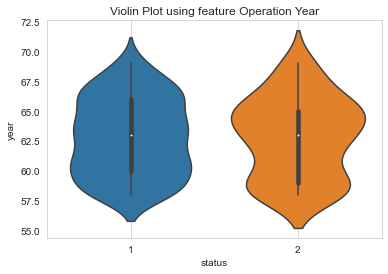

In [165]:
#Violon plot using Operation Year feature
sns.violinplot(x='status',y='year',data=haberman)
plt.grid()
plt.title("Violin Plot using feature Operation Year")
plt.show()

Here we can clearly see the overlap between both the class i.e 1 & 2 upto 90%
Hence, Operation Year feature is just not sufficient to interpret

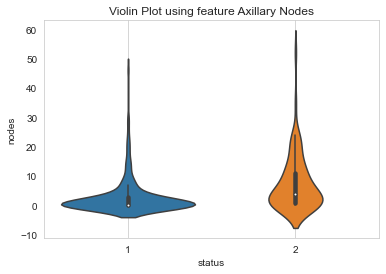

In [167]:
#Violon plot using Axillary Nodes feature
sns.violinplot(x='status',y='nodes',data=haberman)
plt.grid()
plt.title("Violin Plot using feature Axillary Nodes")
plt.show()

Here we are observing that the survived man has axillary nodes equals to 0
Patients who have died had axillary nodes greater than or equal to 1, and as the concentration of axillary node increases the patient is more likely to die 

# BIVARIANT ANALYSIS

SCATTER PLOT

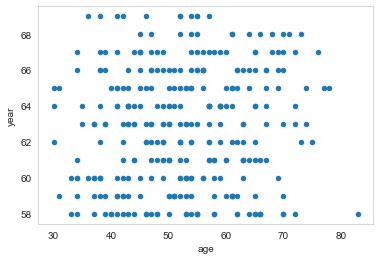

In [144]:
#Using seaborn to plot 

haberman.plot(kind='scatter',x='age',y='year')
print("")

plt.grid() #will show the grid
plt.show() #will show results

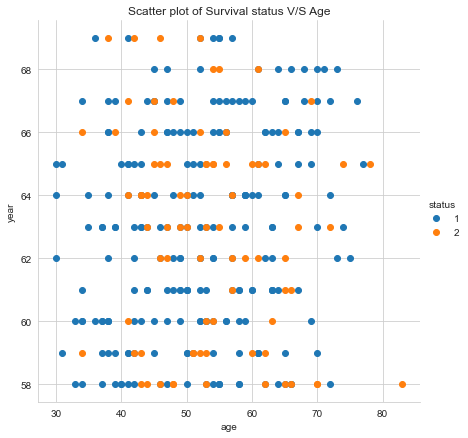

In [145]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue="status",size=6).map(plt.scatter,'age','year').add_legend()
plt.title("Scatter plot of Survival status V/S Age")
plt.show()

Here there is an overlap of around 85%-90%
Therefore, we can't classify survival of patients on the basis of Age and Operation Year

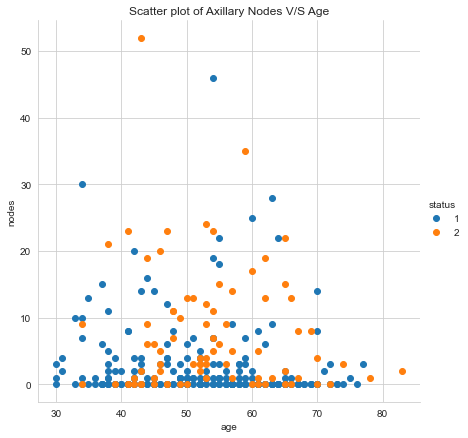

In [146]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue="status",size=6).map(plt.scatter,'age','nodes').add_legend()
plt.title("Scatter plot of Axillary Nodes V/S Age")
plt.show()

As we can see here also we can see there is an overlap of 80%-85%
Therefore we can't classify survival of the patients on the basis of Age and Axillary Nodes

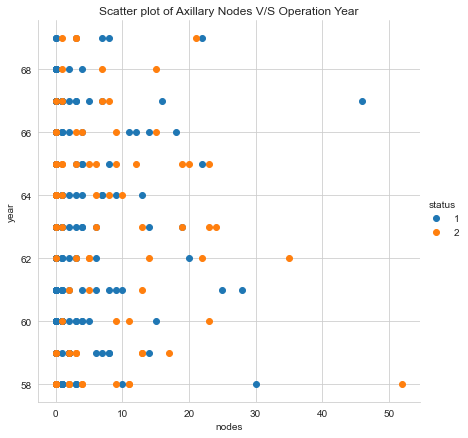

In [147]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue="status",size=6).map(plt.scatter,'nodes','year').add_legend()
plt.title("Scatter plot of Axillary Nodes V/S Operation Year")
plt.show()

The conclusion is here there is a overlap of around 90%-95%.So it very difficult to classify the survival of the patients who have undergone the breast surgery on the basis of Operation Year and Axillary Nodes

# PAIR PLOT

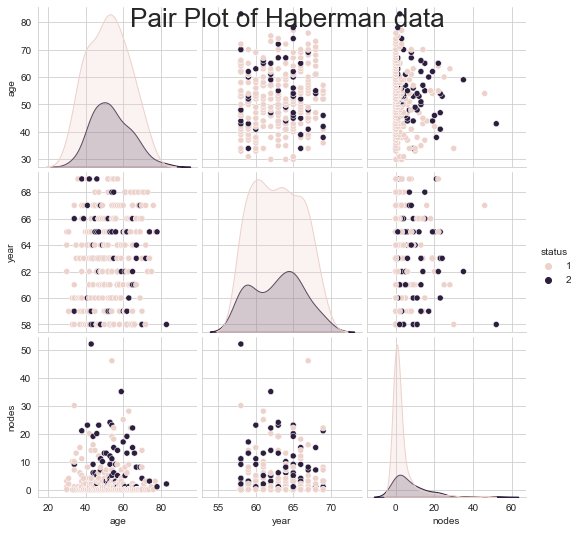

In [150]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(haberman,hue="status",x_vars=['age','year','nodes'],y_vars=['age','year','nodes'])
plt.suptitle("Pair Plot of Haberman data",size=26)
plt.show()

Conclusion:

1.It is very difficult to predict the survival of the patients who had undergone surgery for breast cancer on the basis of these 3 features i.e Age,Operation Year,Axillary Nodes because both the classes i.e 1 & 2 are almost 85%-90% overlapping with each other.


2.Both the classes are linearly inseparable due to intense overlapping.


3.Since both classes are linearly inseparable we need to collect more useful or helpful features in predicting the survival of teh patientswho had undergone the surgery for breast cancer

4.After analysing the data i come to also a conclusion taht Axillary Nodes feature is more useful than Operation Year feature 


5.We need to use non-linear models to predict the survival of the patients